<a href="https://colab.research.google.com/github/danialkhan02/MLApparelPredictor/blob/main/numpyDataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from tabulate import tabulate
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import torchvision
from torchvision import datasets, transforms

torch.manual_seed(1) # set the random seed

In [5]:
# define the training, validation, testing directories
data_dir = "/content/drive/My Drive/images/"
training_data_dir = os.path.join(data_dir, "training")
validation_data_dir = os.path.join(data_dir, "validation")
testing_data_dir = os.path.join(data_dir, "testing")

classes = [
"tshirt",
"suit",
"short",
"shirt",
"suit",
"dress",
"gloves",
"skirt",
"pants",
"long+sleeve+tshirt",
"dress+shirt",
"skirt",
"blouse",
]

In [7]:
# Load and Transform using ImageFolder

# 244 x 244 pixels for the images, each image needs to be resized to be used later in the network
data_transform = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

# generic data loader for taking in the datasets and using it for the network
training_data_set = torchvision.datasets.ImageFolder(root=training_data_dir, transform=data_transform)
validation_data_set = torchvision.datasets.ImageFolder(root=validation_data_dir, transform=data_transform)
testing_data_set = torchvision.datasets.ImageFolder(root=testing_data_dir, transform=data_transform)


In [8]:
# Check out the number of data samples for training, validation, testing data
num_training_data = len(training_data_set)
num_val_data = len(validation_data_set)
num_testing_data = len(testing_data_set)

data = [["Training", num_training_data],
        ["Validation", num_val_data],
        ["Testing", num_testing_data],
        ["Total", (num_training_data + num_val_data + num_testing_data)]]

col_names = ["Type of Data", "Number of Data Samples"]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒════════════════╤══════════════════════════╕
│ Type of Data   │   Number of Data Samples │
╞════════════════╪══════════════════════════╡
│ Training       │                      396 │
├────────────────┼──────────────────────────┤
│ Validation     │                      131 │
├────────────────┼──────────────────────────┤
│ Testing        │                      127 │
├────────────────┼──────────────────────────┤
│ Total          │                      654 │
╘════════════════╧══════════════════════════╛


In [9]:
# define dataloader parameters
batch_size  = 55
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(training_data_set, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(validation_data_set, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

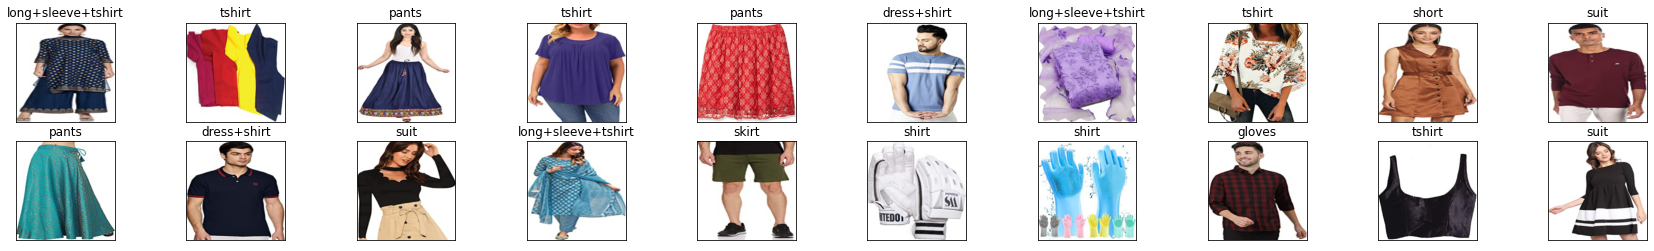

In [13]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(30, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])